In [5]:
from tqdm import tqdm
tqdm.pandas()
from glob import glob

import json
import csv
import numpy as np
import pandas as pd
from collections import Counter

import rdflib
from rdflib import Graph
from data.data import CollectionAccessor, ImageHandler

from search import Search, Randomiser

/home/valentin/home2-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def init_DMG(images_path):
    if images_path is not None:
        image_handler = ImageHandler(image_folder=images_path, keep_prefix=True)
    else:
        image_handler = None

    time_stamp, pub_file, priv_file = CollectionAccessor.get_latest_dump("./data/dumps")
    # print(CollectionAccessor.get_latest_dump("./data/dumps"))

    
    dmg_meta = dict(name="Design Museum Gent (public & private)", id_="DMG_"+time_stamp,
                creation_timestamp=time_stamp)
    df = CollectionAccessor.get_DMG(pub_path=pub_file, #get_latest("./data/dumps", contains="public"),
                                     priv_path=priv_file, #get_latest("./data/dumps", contains="private"),
                                     rights_path="./data/rights.csv",
                                     image_handler=image_handler,
                                     **dmg_meta)
    return image_handler, df

image_handler, dmg = init_DMG("./data/images/")

100%|███████████████████████████████████████████████████████████████████████| 24824/24824 [00:14<00:00, 1691.72it/s]


In [25]:
dmg.image_path.fillna(False).apply(lambda ls: (ls[0] if ls else None))

object_number
1992-0004_0-2      ./data/images/1992-0004_0-2/1992-0004_0-2.JPG
1992-0004_1-2    ./data/images/1992-0004_0-2/1992-0004_1-2$2.JPG
1992-0004_2-2      ./data/images/1992-0004_0-2/1992-0004_2-2.JPG
4521                                                        None
5051                                                        None
                                      ...                       
2022-0028                ./data/images/2022-0028/2022-0028$1.jpg
2022-0025_0-3    ./data/images/2022-0025_0-3/2022-0025_0-3$1.jpg
2022-0025_1-3    ./data/images/2022-0025_0-3/2022-0025_1-3$2.jpg
2022-0025_2-3    ./data/images/2022-0025_0-3/2022-0025_2-3$2.jpg
2022-0025_3-3    ./data/images/2022-0025_0-3/2022-0025_3-3$2.jpg
Name: image_path, Length: 24824, dtype: object

In [ ]:
def init_DMG():
    image_folder = "./data/images/DMG"
    image_handler = ImageHandler(image_folder=image_folder, keep_prefix=False)
    print("image paths loaded...")

    time_stamp, pub_file, priv_file = CollectionAccessor.get_latest_dump("./data/dumps")
    print(CollectionAccessor.get_latest_dump("./data/dumps"))

    
    dmg_meta = dict(name="Design Museum Gent (public & private)", id_="DMG_"+time_stamp,
                creation_timestamp=time_stamp)
    df = CollectionAccessor.get_DMG(pub_path=pub_file, #get_latest("./data/dumps", contains="public"),
                                     priv_path=priv_file, #get_latest("./data/dumps", contains="private"),
                                     rights_path="./data/rights.csv",
                                     image_handler=image_handler,
                                     **dmg_meta)
    
    rand = Randomiser(df, name="Randomiser")
    rand2 = Randomiser(df, name="Randomiser")
    s = Search([rand, rand2])
    return image_handler, df, s

im, dmg, dmg_search = init_DMG()

In [ ]:
recs = dmg.sample(4)
searcher_ids = [s.id for s in dmg_search.searchers[:1]]

In [ ]:
dmg_search(recs, searcher_ids=searcher_ids)

---
# DEV FUNCTIONS

In [ ]:
def search_collection(collection_id, object_ids, concept, model_list):
    cur_coll = get_collection(collection_id)
    object_ids = parse_id_list(object_ids)
    model_list = parse_id_list(model_list)
    cur_search = searches[collection_id]
    print(object_ids)
    scores = cur_search(object_ids)


object_ids = "1987-0120_04-14,1987-1343_2-4,3370,3703_0-2"
object_ids = parse_id_list(object_ids)
object_ids
recs = dmg.loc[object_ids]

In [ ]:
# searcher_scores = [cur_s(recs) for cur_s in dmg_search.searchers]
# searcher_scores = pd.DataFrame({cur_s.name: cur_s for cur_s in searcher_scores})
# searcher_scores.loc[recs.index] = 0.


# searcher_scores.round(3)

In [ ]:


dmg.coll.filter("doos")

---
# TESTING ROUTES

In [1]:
!curl "http://0.0.0.0:8080/collections"

[{"id":"DMG_2025-05-13","name":"Design Museum Gent (public & private)"}]

In [3]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13"

{"name":"Design Museum Gent (public & private)","id_":"DMG_2025-05-13","creation_timestamp":"2025-05-13","number_of_records":24824}

In [4]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13/object-details?object_ids=1987-0120_04-14,1987-1343_2-4,3370,3703_0-2"

[{"inventory_number":"1987-0120_04-14","title":"Ijslepeltje","description":"","designer":"","producer":"J.M. van Kempen en Zonen","design_date":"","production_date":"na 1907","design_place":"","production_place":"Nederland","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"1987-1343_2-4","title":"","description":"","designer":"","producer":"Alice Van Mourik","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"3370","title":"","description":"","designer":"","producer":"","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"3703_0-2","title":"","description":"","designer":"","producer":"","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""}]

In [5]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13/models"

[{"id":"KGSearcher0","name":"KGSearcher"},{"id":"SemanticSearcher2","name":"SemanticSearcher"},{"id":"VisualSearcher3","name":"VisualSearcher"}]

In [7]:
!curl "http://0.0.0.0:8080/moon?ISO_8601_datetime=2024-05-13&lat_degrees=51.05&long_degrees=3.71"

0.15026621349345307

In [9]:
# default params for search
!curl "http://0.0.0.0:8080/DMG_2025-05-13/search"

{"1992-0004_0-2":0.6223639532118131,"1992-0004_1-2":0.8684304963878652,"1992-0004_2-2":0.6729393420931737,"4521":0.5696843636293379,"5051":0.7062878664635325,"5052":0.005108506127518564,"5055":0.14148449872100444,"5057_1-2":0.9272711884072704,"5057_2-2":0.4067600338184164,"5056":0.06700701962413413,"0901":0.7261464826533268,"0977":0.006988726185471306,"0980":0.7422890460165746,"0008":0.07214354817458435,"0832":0.4098516551287573,"0833":0.2611084519303496,"0834":0.9354551361726288,"0836":0.3309094345986169,"0843":0.6607077785664283,"0844":0.1695575289532406,"0847":0.02048167140034285,"0848":0.9207474108739296,"0849":0.6733835626988952,"0850":0.8575731737228149,"0855":0.9002303989448606,"0856":0.3277439882679234,"0864":0.408069172489274,"0867":0.5910502085867587,"0870":0.4156681640408141,"0872":0.3744427435985188,"0873":0.8082575303810047,"0875":0.5931699144895934,"0876":0.55868321142684,"0879":0.7643377121499083,"0880":0.3076414845827804,"0881":0.39751305229687806,"0892":0.5433104385162

In [14]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13/search?object_ids="1987-0120_04-14,1987-1343_2-4,3370,3703_0-2"&concept="schreeuw"&model_list="""

{"0001_1-2":0.05114275876849307,"0001_2-2":0.05114275876849307,"0003_0-3":0.039030102715516594,"0003_1-3":0.040329990639253833,"0003_2-3":0.040329990639253833,"0003_3-3":0.040329990639253833,"0004":0.03257889628043384,"0005":0.055373814603040986,"0006":0.3544839660987483,"0007":0.03553981046529786,"0008":0.053201774314222613,"0009":0.05514368085959579,"0011_0-2":0.3544840041444129,"0011_1-2":0.3544840041444129,"0011_2-2":0.3544840041444129,"0012_0-2":0.3544840041444129,"0012_1-2":0.3544840041444129,"0012_2-2":0.3544840041444129,"0013_0-2":0.17290314119075972,"0013_1-2":0.17290314119075972,"0013_2-2":0.17290314119075972,"0014":0.3544840041444129,"0015_0-3":0.3544840041444129,"0015_1-3":0.3544840041444129,"0015_2-3":0.3544840041444129,"0015_3-3":0.3544840041444129,"0016":0.3544840041444129,"0017":0.04014777918872363,"0018":0.3544840041444129,"0019":0.049552436437107224,"0021":0.08816291314041982,"0022":0.06430530494543775,"0023":0.35448400731366814,"0024":0.06120795458281036,"0025":0.042

In [15]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13/search/order?object_ids="1987-0120_04-14,1987-1343_2-4,3370,3703_0-2"&concept="hello"&model_list="a,b"&skip=200&limit=100&reverse=true"

[{"inventory_number":"1980-0309_0-9","title":"Ensemble voor het echtpaar Kröller-Müller","description":"Dit ensemble met een ovalen tafel, zes stoelen, een kleine bijzettafel en een buffetkast is afkomstig uit een van de huizen van de familie Kröller-Müller in Nederland, vermoedelijk uit het jachtslot of een van de bijgebouwen in het Nationale Park De Hoge Veluwe. Volgens de overlevering zou het ensem …","designer":"Hendrik Petrus Berlage","producer":"H. Pander & Zonen; 't Binnenhuis","design_date":"","production_date":"ca. 1913 — ca. 1919","design_place":"","production_place":"Den Haag; Amsterdam","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"3632_2-3","title":"","description":"","designer":"","producer":"","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"6321_2-2","title":"Portret van Koning Albert I","description":"het geheel bevat 11 portretten van Koni

In [16]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13/search/sample?object_ids="1987-0120_04-14,1987-1343_2-4,3370,3703_0-2"&concept="hello"&model_list="a,b"&k=12"

[{"inventory_number":"1987-1172_11-13","title":"sepia","description":"","designer":"W. Stuurman","producer":"Zenith","design_date":"","production_date":"1931 — 1934","design_place":"Nederland","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"1987-0719_42-65","title":"","description":"","designer":"","producer":"Württembergische Metallwarenfabrik","design_date":"","production_date":"ca. 1903 — ca. 1903","design_place":"","production_place":"Duitsland","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"1976-0233","title":"","description":"","designer":"","producer":"","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"1987-0493","title":"","description":"","designer":"","producer":"Goldsmiths & Silversmiths Co.","design_date":"","production_date":"na 1903","design_place":"","production_place":"Verenigd Koninkrijk","righ

In [17]:
!curl "http://0.0.0.0:8080/DMG_2025-05-13/search/order/filter?object_ids="1987-0120_04-14,1987-1343_2-4,3370,3703_0-2"&concept="hello"&model_ids=""&filter_text="doosje""

[{"inventory_number":"2011-0037","title":"Elektrische naaimachine in koffer, met doosje voor …","description":"","designer":"","producer":"ACEC; Brown Bros","design_date":"","production_date":"ca. 1950 — ca. 1975","design_place":"","production_place":"België; Verenigd Koninkrijk","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"5736_1-2","title":"bloenkroon met imitatie roze bloesem en zilveren b …","description":"fragmenten in doosje verwikkeld in zijden papier","designer":"","producer":"","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"3678","title":"","description":"","designer":"","producer":"","design_date":"","production_date":"","design_place":"","production_place":"","rights_attribution":"In Copyright","image_path":""},{"inventory_number":"1424","title":"Ronde doos met waterlandschap","description":"Dit ronde doosje werd geproduceerd door Daum Frères,

---

# routes 2

In [9]:
import requests as rq
from time import time
from tqdm import tqdm
import pandas as pd

base = "http://0.0.0.0:8080/"
# collection_id="DMG_2025-05-13/"

In [13]:
path = "search"
scores = []
for d in rq.get(base+"/collections").json():
    collection_id = d["id"] +"/"
    params = dict(object_ids="", concept="", model_ids="") #,".join(models))
    search_res = rq.get(base+collection_id+path, params).json()
    scores.append(pd.Series(search_res).sort_values())
    # score_ls.append(scores)

    # print(rq.get(base+coll_id+"/models").json())
    

In [31]:
path = "search/order"
models = rq.get(base+collection_id+"models").json()
models = [d["id"] for d in models]
params = dict(object_ids="IE1896.152,O1912.472,1984.496,O1911.243", concept="", model_ids=",".join(models))
search_res = rq.get(base+collection_id+path, params).json()
# pd.Series(search_res).hist()

In [32]:
pd.DataFrame.from_records(search_res)

,inventory_number,title,description,designer,producer,design_date,production_date,design_place,production_place,rights_attribution,image_path
0,EG2005.6.11,"Aus der Druckfolge des Farbholzschnittes ""Aben...",Teil des Torsos,Henriette Hahn-Brinckmann,Henriette Hahn-Brinckmann,1904,1904,Hamburg,Hamburg,In Copyright,
1,EG2005.6.32,"Aus der Druckfolge des Farbholzschnittes ""Sohn...",,Henriette Hahn-Brinckmann,Henriette Hahn-Brinckmann,1911 — 1915,1911 — 1915,Hamburg,Hamburg,In Copyright,
2,EG2012.6.46,"""Abendstimmung"" (Auflagenexemplar No. 11)","Kopf eines jungen Mannes, umgeben von einem Bl...",Henriette Hahn-Brinckmann,Henriette Hahn-Brinckmann,1904,1904,Hamburg,Hamburg,In Copyright,
3,EG2005.6.20,"Aus der Druckfolge des Farbholzschnittes ""Schw...",,Henriette Hahn-Brinckmann,Henriette Hahn-Brinckmann,1898,1898,Hamburg,Hamburg,In Copyright,
4,EG2005.6.35,"Aus der Druckfolge des Farbholzschnittes ""Sohn...",Junger Mann Geige spielend,Henriette Hahn-Brinckmann,Henriette Hahn-Brinckmann,1911 — 1915,1911 — 1915,Hamburg,Hamburg,In Copyright,
...,...,...,...,...,...,...,...,...,...,...,...
26294,DLN-MO-0004,Figo (Teppich),,unbekannt,unbekannt,vor 2025-06-05,vor 2025-06-05,unbekannt,unbekannt,In Copyright,
26295,IE1896.152,Kuzufu-Stoff: Eine Übersicht,,Nakajima Gyōzan,Nakajima Gyōzan,1872,1872,Tokio,Tokio,In Copyright,
26296,1984.496,Pelike (A: Kampf von Herakles und einer Amazon...,Bauchiges Gefäß auf auswärts gespreiztem Fuß. ...,Klasse der Rote-Linien-Peliken,Klasse der Rote-Linien-Peliken,-0510 — -0490,-0510 — -0490,Athen,Athen,In Copyright,
26297,1900.288,"Vase ""Modell Agen""","Kürbisflaschen-Form. Kupfer- und titanhaltige,...",Porzellanmanufaktur Sèvres,Porzellanmanufaktur Sèvres,1894,1894,Sèvres (Gemeinde),Sèvres (Gemeinde),In Copyright,


In [105]:
path = "models"
models = rq.get(base+collection_id+path).json()
models = [m["id"] for m in models]
models

['KGSearcher0', 'SemanticSearcher2', 'VisualSearcher3']

In [119]:
dmg.coll.filter("stoel")
# dmg.loc[["1999-0032_03-15"]].coll.get_texts()

,object_URI,title,description,objectname_URI,objectname_label,subcollection_URI,subcollection_type,subcollection_name,material_URI,material_label,...,coiner_URI,coiner_label,acquisition_time,is_public,Unnamed: 0,rights,attribution,image_path,time,sort_rank
object_number,,,,,,,,,,,,,,,,,,,,,
3195,https://stad.gent/id/mensgemaaktobject/dmg/530...,Ingelegde stoel met moresken,Deze armstoel steunt op vier poten die doorlop...,[http://vocab.getty.edu/aat/300037776],[armstoel],[https://stad.gent/id/concept/530010570],[https://www.projectcest.be/wiki/Publicatie:In...,[https://apidg.gent.be/opendata/adlib2eventstr...,[],[],...,[https://stad.gent/id/agent/530000494],[onbekend],1907,True,20044.0,CC0 1.0,NaN,NaN,1500/1599,158
1856,https://stad.gent/id/mensgemaaktobject/dmg/530...,Spaanse mansstoel met leeuwenkoppen,Deze statige stoel dankt zijn uitstraling aan ...,[http://vocab.getty.edu/aat/300037772],[stoel],[https://stad.gent/id/concept/530010570],[https://www.projectcest.be/wiki/Publicatie:In...,[https://apidg.gent.be/opendata/adlib2eventstr...,[http://vocab.getty.edu/aat/300012476],[notenhout],...,[https://stad.gent/id/agent/530000494],[onbekend],NaN,True,2357.0,CC0 1.0,NaN,NaN,1600/1649,324
3113,https://stad.gent/id/mensgemaaktobject/dmg/530...,Stoel met ruiters,De rijkelijk bewerkte rugplank en de gesneden ...,[http://vocab.getty.edu/aat/300037772],[stoel],[https://stad.gent/id/concept/530010570],[https://www.projectcest.be/wiki/Publicatie:In...,[https://apidg.gent.be/opendata/adlib2eventstr...,[],[],...,[https://stad.gent/id/agent/530000494],[onbekend],NaN,True,19935.0,CC0 1.0,NaN,NaN,1600~/1600~,536
3535,https://stad.gent/id/mensgemaaktobject/dmg/530...,Spaanse armstoel met siernagels,"Deze stoel heeft een rechthoekige rugleuning, ...",[http://vocab.getty.edu/aat/300037776],[armstoel],[https://stad.gent/id/concept/530010570],[https://www.projectcest.be/wiki/Publicatie:In...,[https://apidg.gent.be/opendata/adlib2eventstr...,[],[],...,[https://stad.gent/id/agent/530000494],[onbekend],1909,True,20424.0,CC0 1.0,NaN,NaN,1600/1700,547
4213,https://stad.gent/id/mensgemaaktobject/dmg/530...,Franje van zijde,Franjes werden ruim aangewend bij de textiele ...,[https://stad.gent/id/concept/530001768],[franje],[],[],[],[http://vocab.getty.edu/aat/300243428],[zijde (textiel)],...,[],[],NaN,False,21754.0,CC0 1.0,NaN,NaN,1600~/1699~,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IB-0042_0-5,https://stad.gent/id/mensgemaaktobject/dmg/530...,meubilair uit de woonst van Charles Vandenhove,NaN,"[http://vocab.getty.edu/aat/300183174, http://...","[staande lamp, stoel, tafel]",[],[],[],[],[],...,[https://stad.gent/id/agent/530001621],"[Vandenhove, Charles]",2021-04-22,False,26173.0,Copyright Status Not Evaluated,NaN,NaN,2021-04-22,24791
2022-0055_0-2,https://stad.gent/id/mensgemaaktobject/dmg/530...,Spreekstoelen,NaN,[http://vocab.getty.edu/aat/300037772],[stoel],[],[],[],[],[],...,"[https://stad.gent/id/agent/530024831, https:/...","[De Wit, Johan, Sabbe, Randoald]",2022-09-18,False,18215.0,CC BY-NC-ND 4.0,Randoald Sabbe; Johan De Wit,NaN,2022/2022,24800
2022-0055_1-2,https://stad.gent/id/mensgemaaktobject/dmg/530...,kneel & relax,De kerkstoel had/heeft een dubbel gebruik. Je ...,[http://vocab.getty.edu/aat/300037772],[stoel],[https://stad.gent/id/mensgemaaktobject/dmg/53...,[],[],[],[],...,[https://stad.gent/id/agent/530024830],"[Sabbe, Randoald]",2022-09-18,False,18216.0,CC BY-NC-ND 4.0,Randoald Sabbe,NaN,2022/2022,24801


In [128]:
path = "search/order"

params = dict(object_ids="3535", concept="stoel", model_ids=",".join(models))
search_res = rq.get(base+collection_id+path, params).json()
# scores = pd.Series(search_res).sort_values()


print("\n".join(pd.DataFrame.from_records(search_res).title[:10]))

stoel
chaise
Tivoli chair
Sim Chair
Sim Chair
Sim Chair
Rieten stoel
First chair
meubelstof
Pic Chair


In [115]:
score_ls = []
path = "search"
for m in models:
    print(parse_id_list(m))
    params = dict(object_ids="1999-0032_03-15", concept="", model_ids=m) #,".join(models))
    search_res = rq.get(base+collection_id+path, params).json()
    scores = pd.Series(search_res).sort_values()
    score_ls.append(scores)
    print(scores.index[-10:])


params = dict(object_ids="", concept="meubel", model_ids="") #,".join(models))
search_res = rq.get(base+collection_id+path, params).json()
scores = pd.Series(search_res).sort_values()
score_ls.append(scores)


['KGSearcher0']
Index(['0799', '1989-0085_1-2', '1992-0135', '6580_074', '1998-0024_112-755',
       '1987-1020_2-2', '2007-0048_4-7', '4380_1-4', '1975-0063', '1221_2-2'],
      dtype='object')
['SemanticSearcher2']
Index(['1999-0032_09-15', '1999-0032_14-15', '1999-0032_01-15',
       '1999-0032_13-15', '1999-0032_06-15', '1999-0032_12-15',
       '1999-0032_07-15', '1999-0032_08-15', '1999-0032_02-15',
       '1999-0032_15-15'],
      dtype='object')
['VisualSearcher3']
Index(['2074', '1987-0487_1-7', '1998-0024_236-755', '1987-0576',
       '1987-0935_4-5', '2006-0106_2-2', '1987-0529_1-3', '1987-0970_06-12',
       '1987-0916_1-2', '1988-0032'],
      dtype='object')


In [72]:
# dmg.loc[scores.sort_values()[-10:].index]
# dmg.coll.order(scores)
pd.DataFrame.from_records(search_res)



,inventory_number,title,description,designer,producer,design_date,production_date,design_place,production_place,rights_attribution,image_path
0,3195,Ingelegde stoel met moresken,Deze armstoel steunt op vier poten die doorlop...,onbekend,,,1500 — 1599,Iberisch Schiereiland,Italië,In Copyright,
1,2013-0039_1-2,Kom van keramiek,,Kaj Gabriel Franck,Arabia,,ca. 1949 — ca. 1964,,Finland,In Copyright,
2,2010-0037_88-97,Kom van porselein,,,Rosenthal,,ca. 1939 — ca. 1956,,Selb,In Copyright,
3,4062,,,,,,1710 — 1720,,Frankrijk,In Copyright,
4,1987-0813_0-2,,,,,,,,,In Copyright,
...,...,...,...,...,...,...,...,...,...,...,...
24819,1826,Stoel met S-vormige rugstijlen,Deze stoel met een vernieuwde beklede zitting ...,onbekend,,,ca. 1750 — ca. 1750,Prinsbisdom Luik,,In Copyright,
24820,0914_0-4,Vier stoelen met rieten zitting en rugleuning,Deze stoelen met rieten zitting en rugleuning ...,onbekend,,,1690 — 1720,Noordelijke Nederlanden,,In Copyright,
24821,3086_2-5,Stoel met rocaillesnijwerk,Deze stoel met hoge rugleuning en rieten zitti...,onbekend,,,1730 — 1799,,,In Copyright,
24822,1847,Spaanse mansstoel met wapenschild,Deze statige stoel dankt zijn uitstraling aan ...,onbekend,,,ca. 1650 — ca. 1650,Zuidelijke Nederlanden,,In Copyright,


In [20]:
dmg.loc["2003-0147_2-2"]

object_URI              https://stad.gent/id/mensgemaaktobject/dmg/530...
title                                                      [zonder titel]
description                                                           NaN
objectname_URI                     [http://vocab.getty.edu/aat/300046001]
objectname_label                                            [halsketting]
subcollection_URI       [https://stad.gent/id/mensgemaaktobject/dmg/53...
subcollection_type                                                     []
subcollection_name                                                     []
material_URI                       [http://vocab.getty.edu/aat/300014570]
material_label                                                [kunststof]
part_label                                                     [sluiting]
part_material_URI                [https://stad.gent/id/concept/530010161]
part_material_label                           [polyamide, polyamide (pp)]
creation_time                         

In [57]:

models = rq.get("http://0.0.0.0:8080/DMG_2025-05-13/models").json()
models = [d["id"] for d in models]

# for d in range(10, 30):
#     q = dict(ISO_8601_datetime=f"2024-05-{d}", 
#              lat_long_degrees="51.05,3.71")
timings = []
for _ in tqdm(range(100)):
    q = dict(object_ids="2015-0130,1987-1343_2-4,2001-0086,3703_0-2",
                 concept="twee halskettingen, deze zitten samen in 1 doosje",
                 model_list=",".join(models))
    
    # print(base+collection_id+path)
    # print(q)
    
    t0 = time()
    
    resp = rq.get(base+collection_id+path, params=q)
        
    resp.json()
    
    # print(time() - t0)
    timings.append(time() - t0)

100%|█████████████████| 100/100 [02:10<00:00,  1.31s/it]


<Axes: >

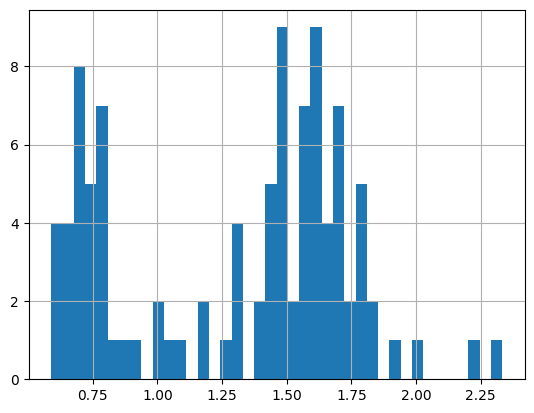

In [58]:
import pandas as pd
pd.Series(timings).hist(bins=40)